In [4]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
url = "https://api.covid19india.org/csv/latest/state_wise.csv"
data = pd.read_csv(url)
data.head()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,Total,29827268,28672170,385220,758140,19/06/2021 12:34:45,11738,TT,4478,1216,53,NaN
1,Andaman and Nicobar Islands,7363,7128,127,108,18/06/2021 21:22:30,0,AN,0,0,0,NaN
2,Andhra Pradesh,1839243,1759390,12224,67629,18/06/2021 18:21:30,0,AP,0,0,0,NaN
3,Arunachal Pradesh,32692,29934,159,2599,19/06/2021 02:15:32,0,AR,0,0,0,[July 25]: All numbers corresponding to Papum ...
4,Assam,477159,436043,4138,35631,18/06/2021 21:22:31,1347,AS,0,0,0,[Jan 1]: 1347 cases i.e Covid +'tive patients ...


In [5]:
data.columns

Index(['State', 'Confirmed', 'Recovered', 'Deaths', 'Active',
       'Last_Updated_Time', 'Migrated_Other', 'State_code', 'Delta_Confirmed',
       'Delta_Recovered', 'Delta_Deaths', 'State_Notes'],
      dtype='object')

In [13]:
covid_data=data[['State','Confirmed','Recovered','Deaths','Active']]
covid_data.head()

,State,Confirmed,Recovered,Deaths,Active
0,Total,29827268,28672170,385220,758140
1,Andaman and Nicobar Islands,7363,7128,127,108
2,Andhra Pradesh,1839243,1759390,12224,67629
3,Arunachal Pradesh,32692,29934,159,2599
4,Assam,477159,436043,4138,35631


In [7]:
covid_data=covid_data[covid_data['State']!='Total']
covid_data.head()

,State,Confirmed,Recovered,Deaths,Active
1,Andaman and Nicobar Islands,7363,7128,127,108
2,Andhra Pradesh,1839243,1759390,12224,67629
3,Arunachal Pradesh,32692,29934,159,2599
4,Assam,477159,436043,4138,35631
5,Bihar,719051,705967,9536,3547


In [8]:
covid_data['Recovery_Rate']=(covid_data['Recovered']/covid_data['Confirmed'])*100
covid_data.head()

,State,Confirmed,Recovered,Deaths,Active,Recovery_Rate
1,Andaman and Nicobar Islands,7363,7128,127,108,96.808366
2,Andhra Pradesh,1839243,1759390,12224,67629,95.658377
3,Arunachal Pradesh,32692,29934,159,2599,91.563685
4,Assam,477159,436043,4138,35631,91.383166
5,Bihar,719051,705967,9536,3547,98.180379


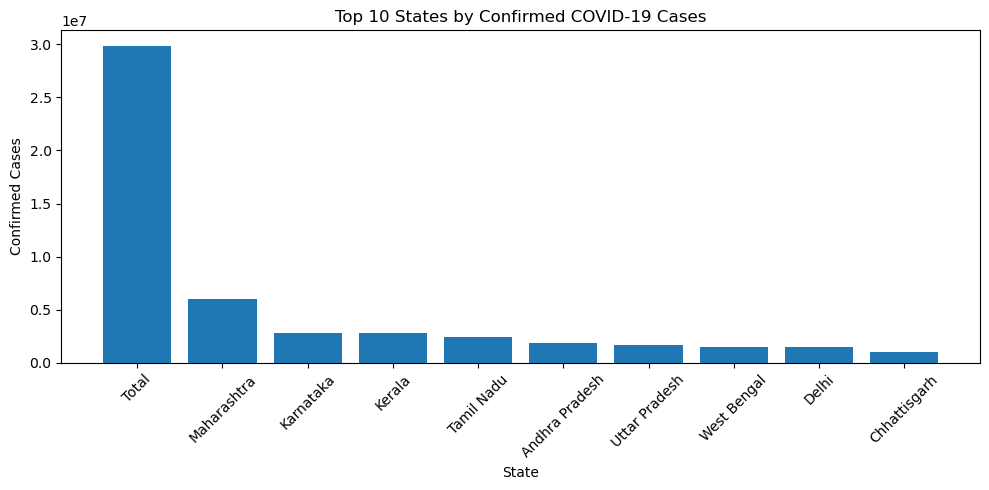

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://api.covid19india.org/csv/latest/state_wise.csv"
covid_data = pd.read_csv(url)

top10 = covid_data.sort_values(by="Confirmed", ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.bar(top10['State'], top10['Confirmed'])
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Confirmed Cases")
plt.title("Top 10 States by Confirmed COVID-19 Cases")
plt.tight_layout()
plt.show()

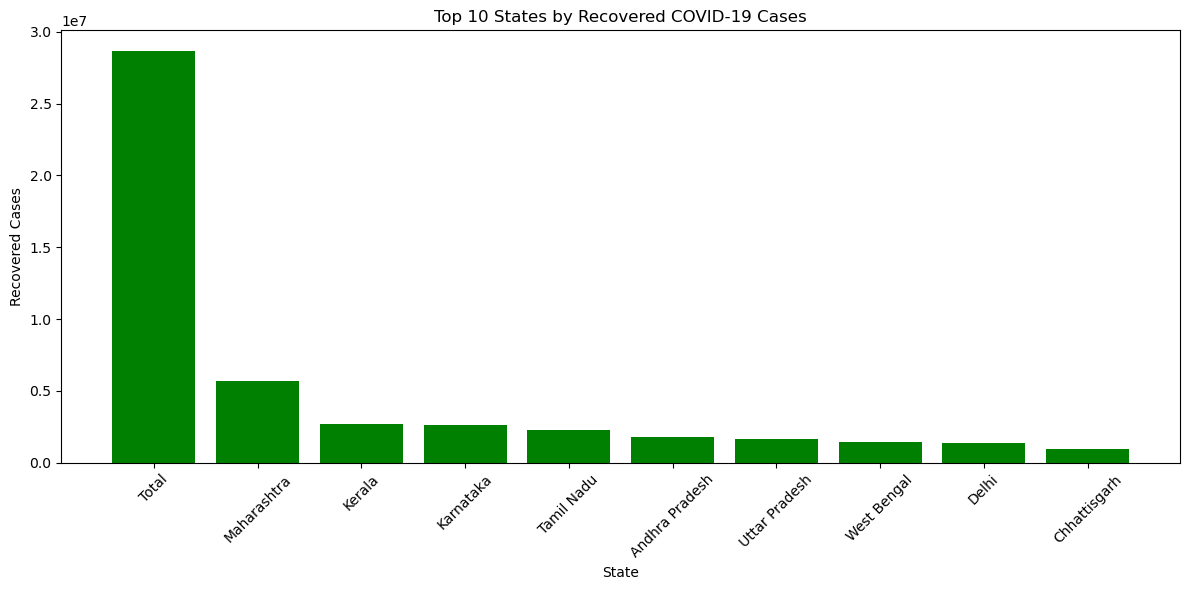

In [26]:

top10_recovered = covid_data[covid_data['State']!='Total']
top10_recovered = covid_data.sort_values(by="Recovered", ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.bar(top10_recovered['State'], top10_recovered['Recovered'],color='green')
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Recovered Cases")
plt.title("Top 10 States by Recovered COVID-19 Cases")
plt.tight_layout()
plt.show()

In [30]:
covid_data.columns

Index(['State', 'Confirmed', 'Recovered', 'Deaths', 'Active',
       'Last_Updated_Time', 'Migrated_Other', 'State_code', 'Delta_Confirmed',
       'Delta_Recovered', 'Delta_Deaths', 'State_Notes'],
      dtype='object')

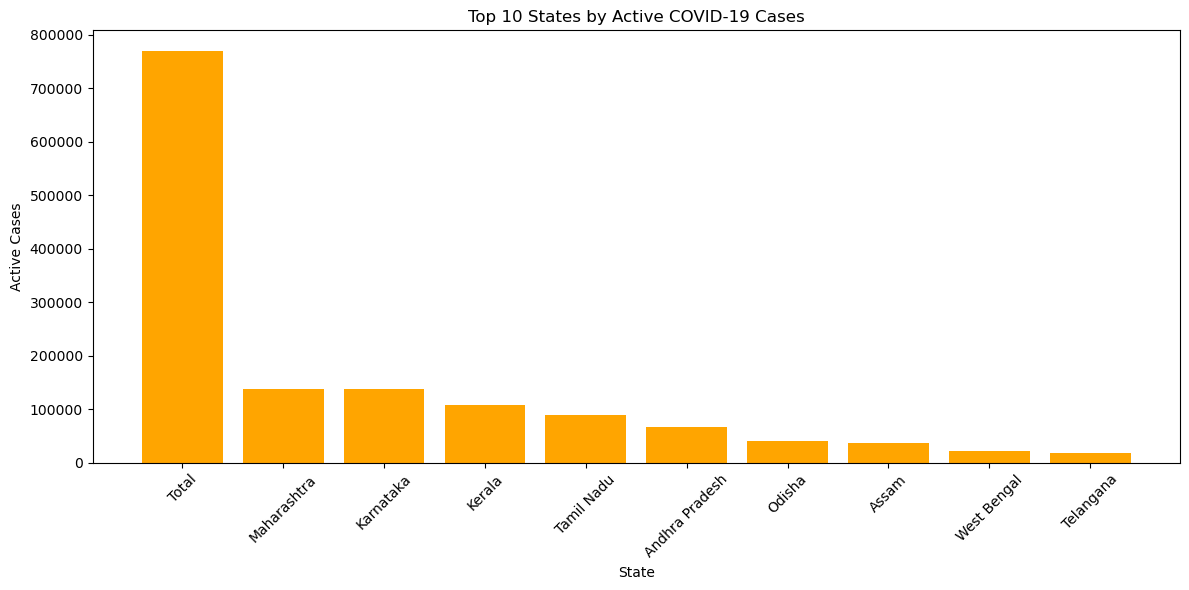

In [35]:

covid_data['Active_Cases'] = covid_data['Confirmed'] - (covid_data['Recovered'] + covid_data['Deaths'])
top10_active = covid_data.sort_values(by='Active_Cases', ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.bar(top10_active['State'], top10_active['Active_Cases'], color='orange')
plt.xticks(rotation=45)
plt.title('Top 10 States by Active COVID-19 Cases')
plt.xlabel('State')
plt.ylabel('Active Cases')
plt.tight_layout()
plt.show()